In [1]:

using JLD2
using FileIO
using QuanticsTCI
import TensorCrossInterpolation as TCI
using PyPlot
import MSSTA
using LinearAlgebra
using SparseIR

rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 9
rcParams["text.usetex"] = true
rcParams["font.family"] = "serif"
rcParams["text.latex.preamble"] = [raw"\usepackage{amsmath}"]
rcParams["font.serif"] = ["Computer Modern Roman"]
rcParams["lines.linewidth"] = 1.0
rcParams["lines.markersize"] = 2

Did not find xfac. QTT functions will not be available.PyError (PyImport_ImportModule

The Python package xfacpy could not be imported by pyimport. Usually this means
that you did not install xfacpy in the Python version being used by PyCall.

PyCall is currently configured to use the Python version at:

/Users/Ritter.Marc/.pyenv/versions/3.8.15/bin/python

and you should use whatever mechanism you usually use (apt-get, pip, conda,
etcetera) to install the Python package containing the xfacpy module.

One alternative is to re-configure PyCall to use a different Python
version on your system: set ENV["PYTHON"] to the path/name of the python
executable you want to use, run Pkg.build("PyCall"), and re-launch Julia.

Another alternative is to configure PyCall to use a Julia-specific Python
distribution via the Conda.jl package (which installs a private Anaconda
Python distribution), which has the advantage that packages can be installed
and kept up-to-date via Julia.  As explained in the P

┌ Info: Precompiling QuanticsTCI [b11687fd-3a1c-4c41-97d0-998ab401d50e]
└ @ Base loading.jl:1423
┌ Info: Precompiling MSSTA [24825735-5140-4dcf-98c0-6955101801e8]
└ @ Base loading.jl:1423


2

In [2]:
tol = 1e-5
prefix = "haldane"
data = load(prefix * "_gk_rank_scaling_tol$(tol).jld2")
#tmp = Dict()
#tmp["params"] = collect(keys(qtts))
#for (beta, R, tol) in keys(qtts)
    #tmp["$(beta) $(R) $(tol)"] = qtts[(beta, R, tol)]
#end
#save(prefix * "_gk_rank_scaling_tol$(tol).jld2", tmp)

Dict{String, Any} with 22 entries:
  "1024.0 10 1.0e-5" => TensorCrossInterpolation.TensorCI{ComplexF64} with rank…
  "16.0 10 1.0e-5"   => TensorCrossInterpolation.TensorCI{ComplexF64} with rank…
  "512.0 10 1.0e-5"  => TensorCrossInterpolation.TensorCI{ComplexF64} with rank…
  "4.0 20 1.0e-5"    => TensorCrossInterpolation.TensorCI{ComplexF64} with rank…
  "1024.0 20 1.0e-5" => TensorCrossInterpolation.TensorCI{ComplexF64} with rank…
  "256.0 30 1.0e-5"  => TensorCrossInterpolation.TensorCI{ComplexF64} with rank…
  "256.0 20 1.0e-5"  => TensorCrossInterpolation.TensorCI{ComplexF64} with rank…
  "64.0 10 1.0e-5"   => TensorCrossInterpolation.TensorCI{ComplexF64} with rank…
  "16.0 30 1.0e-5"   => TensorCrossInterpolation.TensorCI{ComplexF64} with rank…
  "128.0 30 1.0e-5"  => TensorCrossInterpolation.TensorCI{ComplexF64} with rank…
  "1024.0 30 1.0e-5" => TensorCrossInterpolation.TensorCI{ComplexF64} with rank…
  "16.0 20 1.0e-5"   => TensorCrossInterpolation.TensorCI{ComplexF64} with

In [3]:
params = data["params"]
betas = sort(unique([key[1] for key in data["params"]]))
nbits = sort(unique([key[2] for key in data["params"]]))
qtts = Dict()
for key in params
    qtts[key] = data["$(key[1]) $(key[2]) $(key[3])"]
    @show key, TCI.rank(qtts[key])
end
qtts

(key, TCI.rank(qtts[key])) = ((512.0, 30, 1.0e-5), 303)
(key, TCI.rank(qtts[key])) = ((64.0, 30, 1.0e-5), 98)
(key, TCI.rank(qtts[key])) = ((256.0, 20, 1.0e-5), 206)
(key, TCI.rank(qtts[key])) = ((1024.0, 20, 1.0e-5), 476)
(key, TCI.rank(qtts[key])) = ((128.0, 10, 1.0e-5), 97)
(key, TCI.rank(qtts[key])) = ((4.0, 10, 1.0e-5), 44)
(key, TCI.rank(qtts[key])) = ((128.0, 30, 1.0e-5), 136)
(key, TCI.rank(qtts[key])) = ((512.0, 20, 1.0e-5), 303)
(key, TCI.rank(qtts[key])) = ((4.0, 30, 1.0e-5), 44)
(key, TCI.rank(qtts[key])) = ((64.0, 20, 1.0e-5), 98)
(key, TCI.rank(qtts[key])) = ((16.0, 10, 1.0e-5), 66)
(key, TCI.rank(qtts[key])) = ((128.0, 20, 1.0e-5), 136)
(key, TCI.rank(qtts[key])) = ((16.0, 30, 1.0e-5), 68)
(key, TCI.rank(qtts[key])) = ((4.0, 20, 1.0e-5), 44)
(key, TCI.rank(qtts[key])) = ((256.0, 10, 1.0e-5), 105)
(key, TCI.rank(qtts[key])) = ((256.0, 30, 1.0e-5), 206)
(key, TCI.rank(qtts[key])) = ((1024.0, 10, 1.0e-5), 113)
(key, TCI.rank(qtts[key])) = ((16.0, 20, 1.0e-5), 68)
(key, TCI.

Dict{Any, Any} with 21 entries:
  (64.0, 10, 1.0e-5)   => TensorCrossInterpolation.TensorCI{ComplexF64} with ra…
  (64.0, 30, 1.0e-5)   => TensorCrossInterpolation.TensorCI{ComplexF64} with ra…
  (256.0, 20, 1.0e-5)  => TensorCrossInterpolation.TensorCI{ComplexF64} with ra…
  (1024.0, 20, 1.0e-5) => TensorCrossInterpolation.TensorCI{ComplexF64} with ra…
  (128.0, 10, 1.0e-5)  => TensorCrossInterpolation.TensorCI{ComplexF64} with ra…
  (4.0, 10, 1.0e-5)    => TensorCrossInterpolation.TensorCI{ComplexF64} with ra…
  (128.0, 30, 1.0e-5)  => TensorCrossInterpolation.TensorCI{ComplexF64} with ra…
  (512.0, 20, 1.0e-5)  => TensorCrossInterpolation.TensorCI{ComplexF64} with ra…
  (4.0, 30, 1.0e-5)    => TensorCrossInterpolation.TensorCI{ComplexF64} with ra…
  (64.0, 20, 1.0e-5)   => TensorCrossInterpolation.TensorCI{ComplexF64} with ra…
  (16.0, 10, 1.0e-5)   => TensorCrossInterpolation.TensorCI{ComplexF64} with ra…
  (128.0, 20, 1.0e-5)  => TensorCrossInterpolation.TensorCI{ComplexF64} with 

In [4]:
# --- data for G plot ---

deltam = -0.001
t2 = 0.1 #0.1
phi = pi/2
m = 3sqrt(3) * t2 + deltam
β = 512.0
μ = 1.0

nquantics = 10
tolerance = 1e-5

nplot = 1024
plotstep = div(2^nquantics, nplot)

function tobins(i, nbit)
    @assert 1 ≤ i ≤ 2^nbit
    mask = 1 << (nbit-1)
    bin = ones(Int, nbit)
    for n in 1:nbit
        bin[n] = (mask & (i-1)) >> (nbit-n) + 1
        mask = mask >> 1
    end
    return bin
end

function frombins(bin)
    @assert all(1 .≤ bin .≤ 2)
    nbit = length(bin)
    i = 1
    tmp = 2^(nbit-1)
    for n in eachindex(bin)
        i += tmp * (bin[n] -1)
        tmp = tmp >> 1
    end
    return i
end

function scalar(a::Matrix)
    if size(a) == (1, 1)
        return first(a)
    else
        throw(ArgumentError("$a is not a scalar."))
    end
end

function evaluate_qtt(qtt, q::Vector{<:Integer})
    return scalar(prod(T[:, i, :] for (T, i) in zip(qtt, q)))
end

pauli0 = [1. 0.; 0. 1.]
pauli = [
    [0. 1.; 1. 0.],
    [0. -1.0im; 1.0im 0.],
    [1. 0.; 0. -1.]
]

antisymmetricproduct(u, v) = u[1] * v[2] - u[2] * v[1]
    
function haldane(k, t2, ϕ, m)
    a::Vector{Vector{Float64}} =
    [
        [1, 0],
        [-0.5, 0.5sqrt(3)],
        [-0.5, -0.5sqrt(3)]
    ]
    b::Vector{Vector{Float64}} = [a[2] - a[3], a[3] - a[1], a[1] - a[2]]

    return 2 * t2 * cos(ϕ) * sum(cos(k' * bi) for bi in b) * pauli0 +    # NNN hopping
        sum(cos(k' * ai) * pauli[1] + sin(k' * ai) * pauli[2] for ai in a) + # NN hopping
        (m - 2 * t2 * sin(ϕ) * sum(sin(k' * bi) for bi in b)) * pauli[3]    # staggered offset
end

function ghaldane(k, t2, ϕ, m, β, μ)
    ek = eigvals(haldane(k, t2, ϕ,m))
    iv = SparseIR.valueim(SparseIR.FermionicFreq(1), β)
    return sum(1 ./ (iv .- ek .+ μ))
end

function genfunc(t2, ϕ, m, β, μ)
    BZedgex = 4pi / 3
    BZedgey = 8pi / (3sqrt(3))
    function gkb(b)
        nbit = length(b) ÷ 2
        N = 2^nbit
        dkx = 2*BZedgex/N
        dky = 2*BZedgey/N
        ikx = frombins(b[1:2:end])
        iky = frombins(b[2:2:end])
        k = [dkx * (ikx-1) - BZedgex, dky * (iky-1) - BZedgey]
        return ghaldane(k, t2, ϕ, m, β, μ)
    end
end

function gengkdata(gkb, nbit)
    N = 2^nbit
    gkdata = zeros(ComplexF64, N, N)
    for ikx in 1:N, iky in 1:N
        bx = tobins(ikx, nbit)
        by = tobins(iky, nbit)
        b = collect(Iterators.flatten(zip(bx, by)))
        gkdata[ikx, iky] = gkb(b)
    end
    return gkdata
end

refdata = gengkdata(genfunc(t2, phi, m, β, μ), nquantics)
        
tt = TCI.tensortrain(data["$β $nquantics $tolerance"])
qttdata = [
    evaluate_qtt(tt, interleave_dimensions(index_to_quantics(kxi, nquantics), index_to_quantics(kyi, nquantics)))
    for kxi in 1:plotstep:2^nquantics, kyi in 1:plotstep:2^nquantics
]

1024×1024 Matrix{ComplexF64}:
 -25.0096-4.09422im  -24.9708-4.08143im  …  2.00033-0.0122788im
 -24.9803-4.08455im  -24.9408-4.07156im     2.00063-0.0122844im
 -24.8925-4.05572im  -24.8512-4.04217im     2.00155-0.0123013im
 -24.7477-4.00836im  -24.7032-3.99389im     2.00308-0.0123295im
 -24.5476-3.94345im  -24.4989-3.92775im     2.00522-0.0123691im
 -24.2949-3.8623im   -24.2411-3.84512im  …  2.00799-0.0124203im
  -23.993-3.7665im   -23.9331-3.74765im     2.01138-0.0124832im
 -23.6455-3.65784im  -23.5789-3.6372im       2.0154-0.0125577im
 -23.2567-3.53827im  -23.1827-3.51577im     2.02006-0.0126443im
 -22.8309-3.40977im  -22.7493-3.38543im     2.02536-0.0127436im
 -22.3728-3.27434im  -22.2833-3.24824im  …  2.03131-0.0128553im
 -21.8871-3.13393im  -21.7897-3.10619im     2.03794-0.01298im
 -21.3784-2.99038im  -21.2733-2.96116im     2.04524-0.0131182im
         ⋮                               ⋱  
 -21.3784-2.99038im  -21.2733-2.96116im     2.04524-0.0131182im
 -21.8871-3.13393im  -21.7897-3

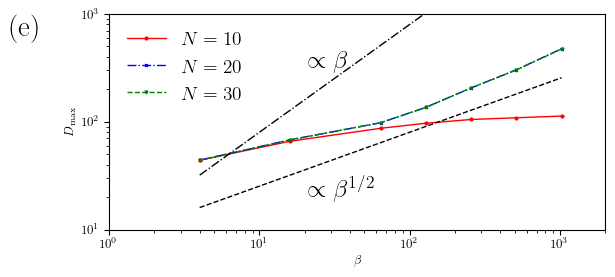

PyObject <matplotlib.legend.Legend object at 0x16574c7c0>

In [5]:
fig = figure(figsize=(6.4, 2.8))
annotate("(e)", xycoords="axes fraction", xy=(-0.2,0.90), fontsize=21)

pcolors = ["r", "b", "g", "k"]
markers = ["o", "x", "v", "+"]
ls = ["-", "-.", "--", ":"]

for (i, nbit) in enumerate(nbits)
    ranks = Int[]
    betas_ = Float64[]
    for beta in betas
        key = (beta,nbit,tol)
        if key ∈ Base.keys(qtts)
            push!(ranks, TCI.rank(qtts[key]))
            push!(betas_, beta)
        end
    end
    loglog(betas_, ranks, marker=markers[i], label=L"N=%$(nbit)", ls=ls[i], color=pcolors[i])
end

loglog(betas, 8*betas, label="", ls="-.", color="k", lw=1.0)
loglog(betas, 8*betas .^ 0.5, label="", ls="--", color="k", lw=1.0)

annotate(L"\propto \beta", xycoords="axes fraction", xy=(0.4, 0.75), fontsize=18)
annotate(L"\propto \beta^{1/2}", xycoords="axes fraction", xy=(0.4, 0.15), fontsize=18)

xlabel(L"\beta")
ylabel(L"D_\mathrm{max}")
ylim([10, 1000])
xlim([1, 2000])
legend(frameon=false, loc="upper left", fontsize=14)

In [6]:
timedata = load("haldane_timings.jld2")

Dict{String, Any} with 4 entries:
  "tci/N"    => [10, 12, 14, 20, 30]
  "svd/data" => [0.567143, 9.47532, 163.844]
  "svd/N"    => [8, 10, 12]
  "tci/data" => [2.68793, 4.80445, 6.98048, 14.2912, 29.0042]

In [7]:
errordata = load("haldane_gk_errors.jld2")

errordata["mpsdata"][512.0]

(Any[69, 78, 88, 98, 107], Any[0.002517835079015824, 0.00020781111203603366, 2.1052618744717315e-5, 2.204767807780028e-6, 2.1943487298737658e-7])

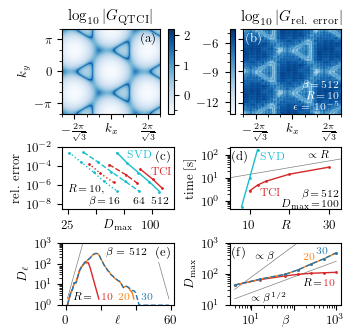

In [17]:
# --- Metadata ---
BZedgex = 4pi / 3
BZedgey = 8pi / (3sqrt(3))
extent = [-BZedgey, BZedgey, -BZedgex, BZedgex]

# --- Colors ---

cmap = "Blues"

svdcolor = "tab:cyan"
tcicolor = "tab:red"

function colorN(N::Int)
    #Ncmap = get_cmap("plasma")
    #return Ncmap((N - 10)/15)
    Dict(
        10 => "tab:red",
        20 => "tab:orange",
        30 => "tab:blue"
    )[N]
end

function colorbeta(beta::Float64)
    Dict(
        16.0 => "",
        64.0 => "",
        512.0 => "tab:red"
    )[beta]
end

function linestylebeta(beta::Float64)
     Dict(
        16.0 => "dotted",
        64.0 => "dashed",
        512.0 => "solid"
    )[beta]
end


# --- Layout ---

figurew = 246
padw, padh = (5, 20)

yaxislabelw = 40
axw = (figurew - padw) / 2 - yaxislabelw

colorbarw = 4
colorbarpad = 6
colorplotaxw = axw - colorbarw - colorbarpad
colorplotaspectratio = (extent[4] - extent[3]) / (extent[2] - extent[1])
topaxh = colorplotaspectratio * colorplotaxw

axh = 45
xaxislabelh = 24
figureh = 2 * axh + topaxh + 3 * xaxislabelh + padh

colx = [i * yaxislabelw + (i - 1) * axw for i in 1:2]
rowy = [i * xaxislabelh + (i - 1) * axh for i in 1:3]

units = [figurew, figureh, figurew, figureh]
ptperinch = 72

function customxaxislabel(ax, label, xy=(0.5, 0))
    ax.annotate(
        label,
        xy=xy,
        xycoords="axes fraction",
        xytext=(0, -3.5-rcParams["xtick.major.size"]),
        textcoords="offset points",
        verticalalignment="top",
        horizontalalignment="center")
end

# --- create figure, axes ---

fig = figure(figsize=(figurew, figureh)./ptperinch)
gplotax = fig.add_axes((colx[1], rowy[3], colorplotaxw, topaxh) ./ units)
gplotcbar = fig.add_axes((colx[1] + colorplotaxw + colorbarpad, rowy[3], colorbarw, topaxh) ./ units)

diffplotax = fig.add_axes((colx[2] + colorbarw + colorbarpad, rowy[3], colorplotaxw, topaxh) ./ units)
diffplotcbar = fig.add_axes((colx[2], rowy[3], colorbarw, topaxh) ./ units)

ax_others = [
    fig.add_axes((cx, ry, axw, axh) ./ units)
    for ry in rowy[1:2], cx in colx[1:2] 
]
errorax = ax_others[2,1]
timeax = ax_others[2,2]
bonddimax = ax_others[1, 1]
dmaxbetaax = ax_others[1,2]

# --- G contour plot ---

gplot = gplotax.imshow(log10.(abs.(qttdata)), cmap=cmap, extent=extent)
colorbar(gplot, cax=gplotcbar)
gplotcbar.set_yticks([0, 1, 2])
gplotcbar.set_yticks(minor=true, [-0.5, 0.5, 1.5])

diffplot = diffplotax.imshow(log10.(abs.(refdata .- qttdata) ./ abs.(refdata)), cmap=cmap, extent=extent)
colorbar(diffplot, cax=diffplotcbar)
diffplotcbar.yaxis.set_ticks_position("left")
diffplotcbar.set_yticks([-6, -9, -12]) #, [L"$10^{-6}$", L"$10^{-9}$", L"$10^{-12}$"])
diffplotcbar.set_yticks(minor=true, [-5, -7, -8, -10, -11, -13])

gplotax.set_title(L"$\log_{10}|G_{\mathrm{QTCI}}|$")
diffplotax.set_title(L"$\log_{10}|G_{\mathrm{rel.~error}}|$")

gplotax.set_yticks(
    [-pi, 0, pi],
    [L"$-\pi$", L"$0$", L"$\pi$"]
)
gplotax.set_ylabel(L"$k_y$")
diffplotax.set_yticks([-pi, 0, pi], ["", "", ""])

for ax in [gplotax, diffplotax]
    ax.set_yticks(
        minor=true,
        [-4pi/3, -2pi/3, -pi/3, 0, pi/3, 2pi/3, 4pi/3]
    )
    ax.set_xticks(
        minor=true,
        [
            -8pi / (3sqrt(3)),
            -4pi / (3sqrt(3)),
            -2pi / (3sqrt(3)),
            0,
            2pi/(3sqrt(3)),
            4pi/(3sqrt(3)),
            8pi/(3sqrt(3)),
        ]
    )
    ax.set_xticks(
        [-2pi/(sqrt(3)), 0, 2pi/(sqrt(3))],
        [L"$-\frac{2\pi}{\sqrt{3}}$", "", L"$\frac{2\pi}{\sqrt{3}}$"]
    )
    customxaxislabel(ax, L"$k_x$")
end

diffplotax.annotate(
    "\$\\beta\\!=\\!$(Int(β))\$\n\$R\\!=\\!$nquantics\$\n\$\\epsilon=10^{-5}\$",
    xy=(1, 0),
    xycoords="axes fraction",
    xytext=(-2, 2),
    textcoords="offset points",
    verticalalignment="bottom",
    horizontalalignment="right",
    fontsize="small",
    color="white"
)

# --- Error plot ---

for beta in Float64[16, 64, 512]
    errorax.semilogy(errordata["tcidata"][beta]..., color=colorN(10), marker=".", linestyle=linestylebeta(beta))
    errorax.semilogy(errordata["mpsdata"][beta]..., color=svdcolor, marker=".", linestyle=linestylebeta(beta))
end
errorax.set_ylim(3e-9, 1e-2)
errorax.set_xlim(20, 120)
    
errorax.set_xticks([25, 50, 75, 100], [L"$25$", "", "", L"$100$"])
errorax.set_yticks([1e-8, 1e-4, 1e-6, 1e-2])
customxaxislabel(errorax, L"$D_{\max}$")
errorax.set_ylabel("rel. error")
    
errorax.annotate(
    L"$\beta\!=\!16$",
    xy=(errordata["mpsdata"][16.0][1][end], 2e-7),
    xycoords="data",
    xytext=(2, -3),
    textcoords="offset points",
    verticalalignment="top",
    horizontalalignment="right",
    fontsize="small"
)

for beta in [64.0, 512.0]
    errorax.annotate(
        "\$$(Int(beta))\$",
        xy=(errordata["mpsdata"][beta][1][end], 2e-7),
        xycoords="data",
        xytext=(0, -3),
        textcoords="offset points",
        verticalalignment="top",
        horizontalalignment="center",
        fontsize="small"
    )
end
errorax.annotate(
    L"$R\!=\!10,$",
    xy=(errordata["mpsdata"][16.0][1][end], 2e-7),
    xycoords="data",
    xytext=(-9, 6),
    textcoords="offset points",
    verticalalignment="top",
    horizontalalignment="right",
    fontsize="small"
)

errorax.annotate(
    "SVD",
    xy=(errordata["mpsdata"][512.0][1][2], 1),
    xycoords=("data", "axes fraction"),
    xytext=(0, -2),
    textcoords="offset points",
    verticalalignment="top",
    horizontalalignment="left",
    fontsize="small",
    color=svdcolor
)
errorax.annotate(
    "TCI",
    xy=(errordata["tcidata"][512.0][1][2], errordata["tcidata"][512.0][2][2]),
    xycoords="data",
    xytext=(-1, 2),
    textcoords="offset points",
    verticalalignment="bottom",
    horizontalalignment="left",
    fontsize="small",
    color=colorN(10)
)
    
# --- Time plot ---

#timex = [minimum(timedata["svd/N"]), maximum(timedata["tci/N"])]
timex = [5, 33]
timeax.semilogy(timex, 2 .* timex, color="gray", linewidth=0.5)
timeax.annotate(
    L"$\propto R$",
    xy = (25, 50),
    xytext = (-1, 3),
    textcoords="offset points",
    fontsize="small"
)

timeax.semilogy(timedata["svd/N"], timedata["svd/data"], marker=".", color=svdcolor, label="SVD", zorder=2.1)
timeax.semilogy(timedata["tci/N"], timedata["tci/data"], marker=".", color=tcicolor, label="TCI")
#timeax.legend(
#    frameon=false,
#    borderpad=0,
#    handlelength=0.7,
#    columnspacing=0.7,
#    handletextpad=0.3,
#    borderaxespad=0
#)
timeax.set_xlim(5, 33)
timeax.set_xticks([10, 20, 30], [L"$10$", "", L"$30$"])
customxaxislabel(timeax, L"$R$")
timeax.set_ylabel("time [s]")

timeax.annotate(
    "SVD",
    xy=(timedata["svd/N"][end], timedata["svd/data"][end]),
    xytext=(2, -2),
    textcoords="offset points",
    verticalalignment="top",
    horizontalalignment="left",
    color=svdcolor,
    fontsize="small"
)

timeax.annotate(
    "TCI",
    xy=(timedata["tci/N"][2], timedata["tci/data"][2]),
    xytext=(2, -2),
    textcoords="offset points",
    verticalalignment="top",
    horizontalalignment="left",
    color=tcicolor,
    fontsize="small"
)
timeax.annotate(
    #"\$\\beta\\!=\\!512\$\n\$\\delta_m\\!=\\!10^{-3}\$\n\$D_{\\max}\\!=\\!100\$",
    "\$\\beta\\!=\\!512\$\n\$D_{\\max}\\!=\\!100\$",
    xy=(1, 0),
    xycoords="axes fraction",
    xytext=(-2, 2),
    textcoords="offset points",
    horizontalalignment="right",
    fontsize="small",
)

# --- Bond dim plot ---

bonddimax.semilogy(
    1:59,
    [min(2^x, 2^(60-x)) for x in 1:59],
    color="gray",
    linewidth=0.5
)


for N in [10, 20]
    bonddimax.semilogy(1:2N-1, TCI.linkdims(qtts[(512.0, N, 1e-5)]), color=colorN(N))
end
bonddimax.semilogy(1:59, TCI.linkdims(qtts[(512.0, 30, 1e-5)]), linestyle="dashed", color=colorN(30))

bonddimax.set_ylim(1, 1e3)
bonddimax.set_xticks(0:20:60, [L"$0$", "", "", L"$60$"])
customxaxislabel(bonddimax, L"$\ell$")
bonddimax.set_ylabel(L"$D_{\ell}$")

bonddimax.annotate(
    L"$R\!=$",
    xy=(10, 2),
    #xytext=(2, 0),
    #textcoords="offset points",
    horizontalalignment="center",
    fontsize="small",
)
        
bonddimax.annotate(
    L"$10$",
    xy=(20, 2),
    xytext=(1, 0),
    textcoords="offset points",
    color=colorN(10),
    fontsize="small",
)
bonddimax.annotate(
    L"$20$",
    xy=(38, 2),
    xytext=(-2, 0),
    textcoords="offset points",
    horizontalalignment="right",
    color=colorN(20),
    fontsize="small",
)       
bonddimax.annotate(
    L"$30$",
    xy=(42, 2),
    xytext=(1, 0),
    textcoords="offset points",
    color=colorN(30),
    fontsize="small",
)
bonddimax.annotate(
    L"$\beta=512$",
    xy=(0.5, 1),
    xycoords="axes fraction",
    xytext=(6, -3),
    textcoords="offset points",
    verticalalignment="top",
    horizontalalignment="center",
    fontsize="small",
    bbox=Dict("boxstyle"=>"square","fc"=>"white","linestyle"=>""),
    zorder=2.1
)
    
# --- Dmax plot ---
pcolors = ["r", "b", "g", "k"]
markers = [".", "v", "."]
ls = ["-", "-", "--"]

dmaxbetaax.loglog(betas, 8*betas, color="gray", linewidth=0.5)
dmaxbetaax.loglog(betas, 8*betas .^ 0.5, color="gray", linewidth=0.5)

for (i, nbit) in enumerate(nbits)
    ranks = Int[]
    betas_ = Float64[]
    for beta in betas
        key = (beta,nbit,tol)
        if key ∈ Base.keys(qtts)
            push!(ranks, TCI.rank(qtts[key]))
            push!(betas_, beta)
        end
    end
    dmaxbetaax.loglog(betas_, ranks, label=L"N=%$(nbit)", ls=ls[i], color=colorN(nbit), marker=".")
end
                    
dmaxbetaax.set_ylabel(L"D_\mathrm{max}")
dmaxbetaax.set_ylim([10, 1000])
#dmaxbetaax.set_xlim([1, 2000])
#dmaxbetaax.legend(frameon=false, loc="upper left", fontsize=14)

dmaxbetaax.set_xticks([1e1, 1e2, 1e3], [L"$10^1$", "", L"$10^3$"])
customxaxislabel(dmaxbetaax, L"$\beta$")


dmaxbetaax.annotate(
    L"\propto \beta",
    xy=(40, 320),
    xytext=(-2, 0),
    textcoords="offset points",
    horizontalalignment="right",
    fontsize="small"
)
dmaxbetaax.annotate(
    L"\propto \beta^{1/2}",
    xy=(10, 20),
    xytext=(0, 0),
    textcoords="offset points",
    horizontalalignment="left",
    verticalalignment="center",
    fontsize="small"
)

dmaxbetaax.annotate(
    L"$R\!=$",
    xy=(1024, TCI.rank(qtts[(1024.0, 10, 1e-5)])),
    xytext=(-10, -4),
    textcoords="offset points",
    horizontalalignment="right",
    verticalalignment="top",
    fontsize="small",
)
dmaxbetaax.annotate(
    L"$10$",
    xy=(1024, TCI.rank(qtts[(1024.0, 10, 1e-5)])),
    xytext=(0, -4),
    textcoords="offset points",
    horizontalalignment="right",
    verticalalignment="top",
    fontsize="small",
    color=colorN(10)
)
dmaxbetaax.annotate(
    L"$20$",
    xy=(512, TCI.rank(qtts[(512.0, 20, 1e-5)])),
    xytext=(-6, 5),
    textcoords="offset points",
    horizontalalignment="right",
    verticalalignment="top",
    fontsize="small",
    color=colorN(20)
)
dmaxbetaax.annotate(
    L"$30$",
    xy=(1024, TCI.rank(qtts[(1024.0, 30, 1e-5)])),
    xytext=(-6, 5),
    textcoords="offset points",
    horizontalalignment="right",
    verticalalignment="top",
    fontsize="small",
    color=colorN(30)
)

                    
# ---

allaxes = [gplotax, diffplotax, errorax, timeax, bonddimax, dmaxbetaax]
for (i, label, ax) in zip(1:6, "abcdef", allaxes)
    color = i==2 ? "white" : "black"
    leftright = isodd(i) ? "right" : "left"
    xy = Dict(
        "left" => (0, 1),
        "right" => (1, 1)
    )[leftright]
    offset = Dict(
        "left" => (2, -2),
        "right" => (-2, -2)
    )[leftright]
    
    ax.annotate(
        "(" * label * ")",
        xy=xy,
        xycoords="axes fraction",
        xytext=offset,
        textcoords="offset points",
        horizontalalignment=leftright,
        verticalalignment="top",
        color=color,
        bbox=(i <= 2) ? nothing : Dict("boxstyle"=>"square","fc"=>"white","linestyle"=>""),
        zorder=2 - iseven(i)
    )
end

fig.savefig("haldane-dyson.pdf")

In [9]:
timedata["tci/data"]

5-element Vector{Float64}:
  2.687926554
  4.804445761
  6.980476145000001
 14.291222001000001
 29.004227573